In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [17]:
def fun(x):
    return np.sin(x) + 0.1*x**2

def generate_data(n=1000, split_ratio=0.8):
    np.random.seed(42)
    x = np.random.uniform(-10, 10, n)
    x_train, x_test = x[:int(n*split_ratio)], x[int(n*split_ratio):]
    y_train = fun(x_train)
    y_test = fun(x_test)
    x_train = torch.tensor(x_train, dtype=torch.float32).reshape(-1, 1)
    y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
    x_test = torch.tensor(x_test, dtype=torch.float32).reshape(-1, 1)
    y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
    return x_train, y_train, x_test, y_test



In [18]:
class ReluModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ReluModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

def train_model(model, epochs, x_train, y_train):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    losses = []
    for epoch in range(epochs):
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
    return losses

In [19]:
def plot_results(x_test, y_test, y_pred):
    """可视化拟合效果"""
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test.numpy(), y_test.numpy(), label="真实值", color='blue', alpha=0.5)
    plt.scatter(x_test.numpy(), y_pred, label="预测值", color='red', alpha=0.5)
    plt.title("ReLU 神经网络拟合效果")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

def evaluate_model(model, x_test, y_test):
    with torch.no_grad():
        y_pred = model(x_test)
        plot_results(x_test, y_test, y_pred)

Epoch 0, Loss: 12.2636
Epoch 100, Loss: 0.5878
Epoch 200, Loss: 0.3073
Epoch 300, Loss: 0.2571
Epoch 400, Loss: 0.2416
Epoch 500, Loss: 0.2347
Epoch 600, Loss: 0.2314
Epoch 700, Loss: 0.2299
Epoch 800, Loss: 0.2292
Epoch 900, Loss: 0.2289
Epoch 1000, Loss: 0.2287
Epoch 1100, Loss: 0.2286
Epoch 1200, Loss: 0.2286
Epoch 1300, Loss: 0.2286
Epoch 1400, Loss: 0.2285
Epoch 1500, Loss: 0.2285
Epoch 1600, Loss: 0.2285
Epoch 1700, Loss: 0.2285
Epoch 1800, Loss: 0.2285
Epoch 1900, Loss: 0.2285
Epoch 2000, Loss: 0.2285
Epoch 2100, Loss: 0.2288
Epoch 2200, Loss: 0.2284
Epoch 2300, Loss: 0.2284
Epoch 2400, Loss: 0.2284
Epoch 2500, Loss: 0.2284
Epoch 2600, Loss: 0.2284
Epoch 2700, Loss: 0.2284
Epoch 2800, Loss: 0.2285
Epoch 2900, Loss: 0.2284
Epoch 3000, Loss: 0.2316
Epoch 3100, Loss: 0.2286
Epoch 3200, Loss: 0.2285
Epoch 3300, Loss: 0.2284
Epoch 3400, Loss: 0.2284
Epoch 3500, Loss: 0.2284
Epoch 3600, Loss: 0.2284
Epoch 3700, Loss: 0.2288
Epoch 3800, Loss: 0.2288
Epoch 3900, Loss: 0.2284
Epoch 4000,

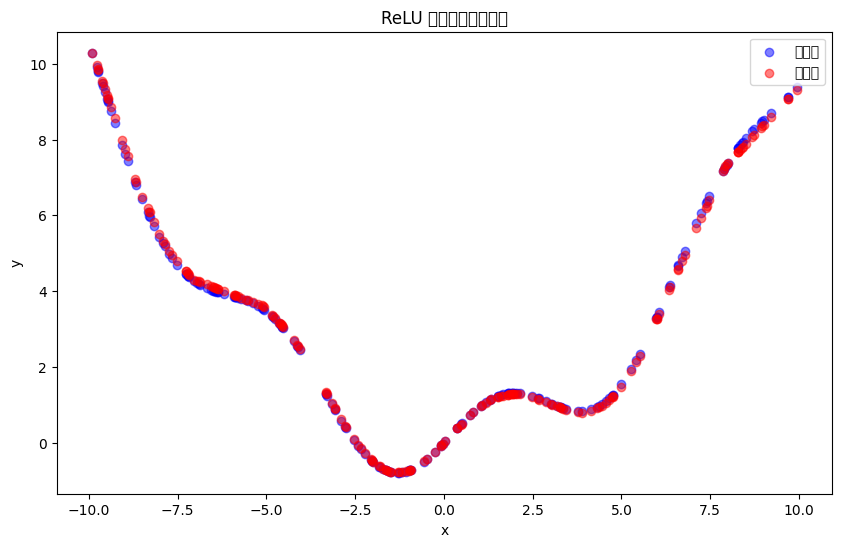

In [23]:
if __name__ == '__main__':
    x_train, y_train, x_test, y_test = generate_data()
    
    model = ReluModel(input_size=1, hidden_size=64, output_size=1)
    
    losses = train_model(model=model, epochs=20000, x_train=x_train, y_train=y_train)
    
    evaluate_model(model, x_test, y_test)
    